<a href="https://colab.research.google.com/github/almasurinarshad/TaskPrediction/blob/main/NETFLIXDataExploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Data Import


In [43]:
install.packages("corrplot")
install.packages("plotly")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘textshaping’, ‘shiny’, ‘downlit’, ‘ragg’, ‘miniUI’, ‘pkgdown’, ‘profvis’, ‘roxygen2’, ‘testthat’, ‘urlchecker’


Warning message in install.packages("devtools"):
“installation of package ‘textshaping’ had non-zero exit status”
Warning message in install.packages("devtools"):
“installation of package ‘ragg’ had non-zero exit status”
Warning message in install.packages("devtools"):
“installation of package ‘pkgdown’ had non-zero exit status”
Warning message in install.packages("devtools"):
“installation of package ‘devtools’ had non-zero exit status”


In [44]:
install.packages("devtools")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘textshaping’, ‘ragg’, ‘pkgdown’


Warning message in install.packages("devtools"):
“installation of package ‘textshaping’ had non-zero exit status”
Warning message in install.packages("devtools"):
“installation of package ‘ragg’ had non-zero exit status”
Warning message in install.packages("devtools"):
“installation of package ‘pkgdown’ had non-zero exit status”
Warning message in install.packages("devtools"):
“installation of package ‘devtools’ had non-zero exit status”


In [63]:
install.packages("webr")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘gdtools’, ‘rvg’, ‘flextable’, ‘rrtable’, ‘ztable’


Warning message in install.packages("webr"):
“installation of package ‘gdtools’ had non-zero exit status”
Warning message in install.packages("webr"):
“installation of package ‘rvg’ had non-zero exit status”
Warning message in install.packages("webr"):
“installation of package ‘flextable’ had non-zero exit status”
Warning message in install.packages("webr"):
“installation of package ‘ztable’ had non-zero exit status”
Warning message in install.packages("webr"):
“installation of package ‘rrtable’ had non-zero exit status”
Warning message in install.packages("webr"):
“installation of package ‘webr’ had non-zero exit status”


In [64]:
 install.packages("Rcpp")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [66]:
#Loading Data & Packages
Netflix=read.csv("netflix_titles.csv")

library(tidyverse)
library(dplyr)
library(plotly)
library(tibble)
library(ggplot2)
library(moonBook)
library(cowplot)
library(boot)
library(corrplot)
library(Rcpp)

2. Data Summary

In [49]:
#summary of the dataset
dim(Netflix)
str(Netflix)
summary(Netflix)

[1] 8807   12

'data.frame':	8807 obs. of  12 variables:
 $ show_id     : chr  "s1" "s2" "s3" "s4" ...
 $ type        : chr  "Movie" "TV Show" "TV Show" "TV Show" ...
 $ title       : chr  "Dick Johnson Is Dead" "Blood & Water" "Ganglands" "Jailbirds New Orleans" ...
 $ director    : chr  "Kirsten Johnson" "" "Julien Leclercq" "" ...
 $ cast        : chr  "" "Ama Qamata, Khosi Ngema, Gail Mabalane, Thabang Molaba, Dillon Windvogel, Natasha Thahane, Arno Greeff, Xolile "| __truncated__ "Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabiha Akkari, Sofia Lesaffre, Salim Kechiouche, Noureddine Farihi, G"| __truncated__ "" ...
 $ country     : chr  "United States" "South Africa" "" "" ...
 $ date_added  : chr  "September 25, 2021" "September 24, 2021" "September 24, 2021" "September 24, 2021" ...
 $ release_year: int  2020 2021 2021 2021 2021 2021 2021 1993 2021 2021 ...
 $ rating      : chr  "PG-13" "TV-MA" "TV-MA" "TV-MA" ...
 $ duration    : chr  "90 min" "2 Seasons" "1 Season" "1 Season" ...
 $ listed_in 

   show_id              type              title             director        
 Length:8807        Length:8807        Length:8807        Length:8807       
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
     cast             country           date_added         release_year 
 Length:8807        Length:8807        Length:8807        Min.   :1925  
 Class :character   Class :character   Class :character   1st Qu.:2013  
 Mode  :character   Mode  :character   Mode  :character   Median :2017  
                                                          Mean   :2014  
                                                          3rd Qu.:2019  
                       

3. Data Preparation

3.1 Modifying Variables

In [ ]:
#Dropping Unimportant Variable
Netflix_1=subset(Netflix, select = -c(show_id, description))
dim(Netflix_1)

In [51]:
#Convert date_added to date
Netflix_1$date_added = as.Date(Netflix_1$date_added, format = " %B %d, %Y")
Netflix_2=Netflix_1[!is.na(Netflix_1$date_added),]

In [52]:
#transform rating to four category
Netflix_2$rating[Netflix_2$rating%in%c("TV-Y","TV-G","G")]="Kids"
Netflix_2$rating[Netflix_2$rating%in%c("TV-Y7-FV","TV-Y7","PG","TV-PG")]="Older Kids"
Netflix_2$rating[Netflix_2$rating%in%c("TV-14","PG-13")]="Teens"
Netflix_2$rating[Netflix_2$rating%in%c("TV-MA","R","NR","NC-17","UR")]="Adults"
Netflix_2$rating[Netflix_2$rating%in%c("66 min","74 min","84 min")]=NA



In [53]:
#Convert insignificance value in variable rating to missing value
Netflix_2$rating[Netflix_2$rating%in%c("66 min","74 min","84 min")]=NA

In [54]:
#Standardized season & duration
Netflix_3=separate(Netflix_2,duration,c("duration_time","duration_type"),sep=" ")
Netflix_3$duration_time=as.integer(Netflix_3$duration_time)
Netflix_3$duration_in_min=ifelse(Netflix_3$duration_type == "Season" | Netflix_3$duration_type == "Seasons", Netflix_3$duration_time*908.5 , Netflix_3$duration_time)
Netflix_3$duration_in_hour=Netflix_3$duration_in_min/60

Warning message:
“Expected 2 pieces. Missing pieces filled with `NA` in 3 rows [5542, 5795, 5814].”


3.2 Checking Missing Value

In [56]:
#missing value
any(is.na(Netflix_3))
sum(is.na(Netflix_3))
sapply(Netflix_3, function(x) sum(is.na(x)))

#replace missing value with 'missing'
Netflix_4=replace(Netflix_3,is.na(Netflix_3), 'Missing')
head(Netflix_4)
summary(Netflix_4)

#Change categorical to as.factor
Netflix_4[,c(1:5,8:13)]=lapply(Netflix_4[,c(1:5,8:13)],factor)
str(Netflix_4)

#drop missing value using complete.cases
Netflix_5=Netflix_3[complete.cases(Netflix_3), ]

#change categorical to as.factor
Netflix_5[,c(1:5,8:13)]=lapply(Netflix_5[,c(1:5,8:13)],factor)
str(Netflix_5)
summary(Netflix_5)


[1] TRUE

[1] 15

type            title         director             cast 
               0                0                0                0 
         country       date_added     release_year           rating 
               0                0                0                3 
   duration_time    duration_type        listed_in  duration_in_min 
               3                3                0                3 
duration_in_hour 
               3

,type,title,director,cast,country,date_added,release_year,rating,duration_time,duration_type,listed_in,duration_in_min,duration_in_hour
,<chr>,<chr>,<chr>,<chr>,<chr>,<date>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,Movie,Dick Johnson Is Dead,Kirsten Johnson,,United States,2021-09-25,2020,Teens,90,min,Documentaries,90,1.5
2,TV Show,Blood & Water,,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thabang Molaba, Dillon Windvogel, Natasha Thahane, Arno Greeff, Xolile Tshabalala, Getmore Sithole, Cindy Mahlangu, Ryle De Morny, Greteli Fincham, Sello Maake Ka-Ncube, Odwa Gwanya, Mekaila Mathys, Sandi Schultz, Duane Williams, Shamilla Miller, Patrick Mofokeng",South Africa,2021-09-24,2021,Adults,2,Seasons,"International TV Shows, TV Dramas, TV Mysteries",1817,30.2833333333333
3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabiha Akkari, Sofia Lesaffre, Salim Kechiouche, Noureddine Farihi, Geert Van Rampelberg, Bakary Diombera",,2021-09-24,2021,Adults,1,Season,"Crime TV Shows, International TV Shows, TV Action & Adventure",908.5,15.1416666666667
4,TV Show,Jailbirds New Orleans,,,,2021-09-24,2021,Adults,1,Season,"Docuseries, Reality TV",908.5,15.1416666666667
5,TV Show,Kota Factory,,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam Khan, Ahsaas Channa, Revathi Pillai, Urvi Singh, Arun Kumar",India,2021-09-24,2021,Adults,2,Seasons,"International TV Shows, Romantic TV Shows, TV Comedies",1817,30.2833333333333
6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, Henry Thomas, Kristin Lehman, Samantha Sloyan, Igby Rigney, Rahul Kohli, Annarah Cymone, Annabeth Gish, Alex Essoe, Rahul Abburi, Matt Biedel, Michael Trucco, Crystal Balint, Louis Oliver",,2021-09-24,2021,Adults,1,Season,"TV Dramas, TV Horror, TV Mysteries",908.5,15.1416666666667


     type              title             director             cast          
 Length:8797        Length:8797        Length:8797        Length:8797       
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
   country            date_added          release_year     rating         
 Length:8797        Min.   :2008-01-01   Min.   :1925   Length:8797       
 Class :character   1st Qu.:2018-04-06   1st Qu.:2013   Class :character  
 Mode  :character   Median :2019-07-02   Median :2017   Mode  :character  
                    Mean   :2019-05-17   Mean   :2014                     
                    3rd Qu.:2020-08-19   3rd Qu.:2019                     
           

'data.frame':	8797 obs. of  13 variables:
 $ type            : Factor w/ 2 levels "Movie","TV Show": 1 2 2 2 2 2 1 1 2 1 ...
 $ title           : Factor w/ 8797 levels "¡Ay, mi madre!",..: 1974 1088 2643 3505 3863 4573 4882 6055 7215 7770 ...
 $ director        : Factor w/ 4529 levels "","A. L. Vijay",..: 2305 1 2120 1 1 2877 3555 1514 306 4170 ...
 $ cast            : Factor w/ 7683 levels "","'Najite Dede, Jude Chukwuka, Taiwo Arimoro, Odenike Odetola, Funmi Eko, Keppy Ekpenyong",..: 1 414 6299 1 4821 3791 7274 4040 4845 4858 ...
 $ country         : Factor w/ 749 levels "",", France, Algeria",..: 605 428 1 1 253 1 1 665 508 605 ...
 $ date_added      : Date, format: "2021-09-25" "2021-09-24" ...
 $ release_year    : int  2020 2021 2021 2021 2021 2021 2021 1993 2021 2021 ...
 $ rating          : Factor w/ 6 levels "","Adults","Kids",..: 6 2 2 2 2 2 5 2 6 6 ...
 $ duration_time   : Factor w/ 211 levels "1","10","100",..: 201 105 1 1 105 1 202 30 200 7 ...
 $ duration_type   : Factor w

      type                 title                        director   
 Movie  :6128   ¡Ay, mi madre!:   1                         :2624  
 TV Show:2666   '76           :   1   Rajiv Chilaka         :  19  
                '89           :   1   Raúl Campos, Jan Suter:  18  
                (T)ERROR      :   1   Marcus Raboy          :  16  
                (Un)Well      :   1   Suhas Kadav           :  16  
                #Alive        :   1   Jay Karas             :  14  
                (Other)       :8788   (Other)               :6087  
                                                                                      cast     
                                                                                        : 825  
 David Attenborough                                                                     :  19  
 Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jigna Bhardwaj, Rajesh Kava, Mousam, Swapnil:  14  
 Samuel West                                                            

There are two approaches to handle missing values. For Option A, we will remove all missing values, meanwhile for Option B, we will tag rows with missing values as ‘Missing’. 


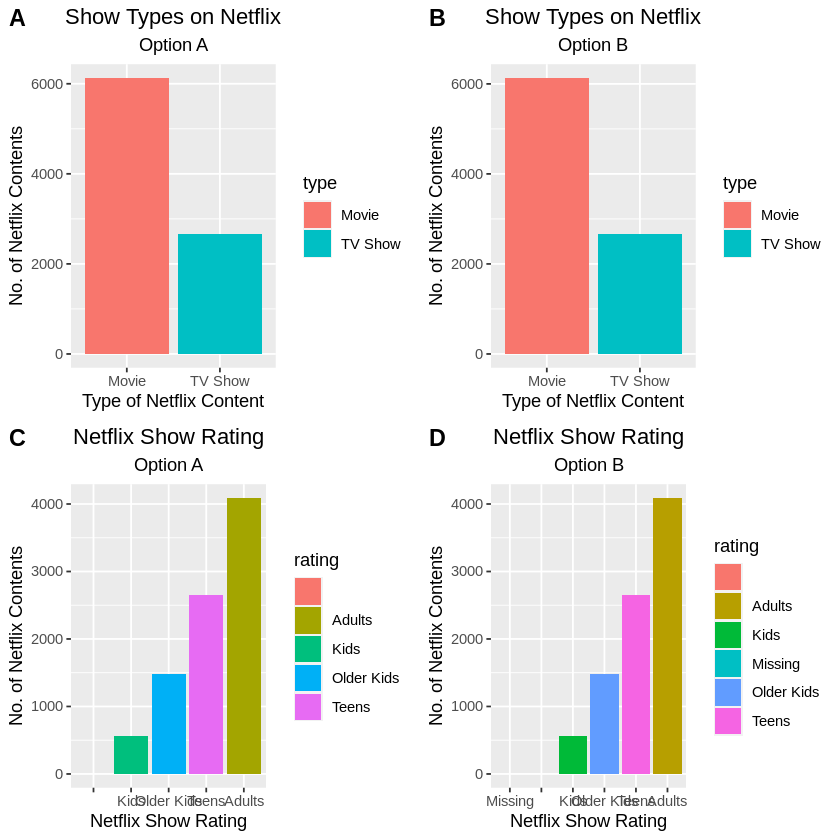

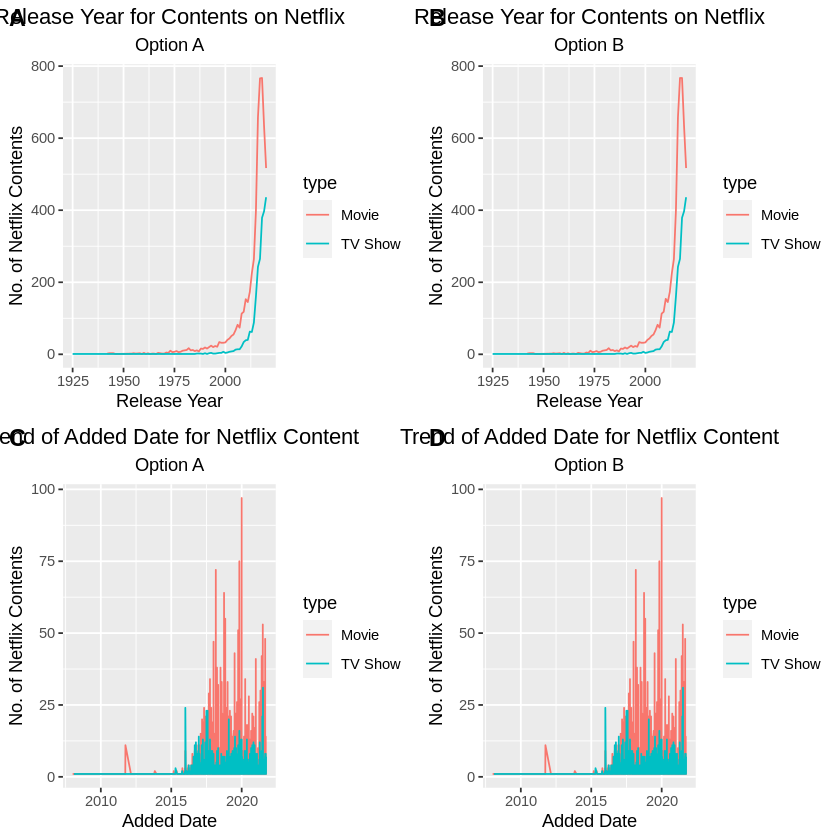

In [69]:
#Show type on netflix
Netflix_5_Show <- Netflix_5 %>%
  count(type) %>%
  ggplot() + geom_col(aes(x = type, y = n, fill = type)) +
  labs(title = "Show Types on Netflix",subtitle = "Option A", y = 'No. of Netflix Contents', x = 'Type of Netflix Content') +
  theme(plot.title = element_text(hjust = 0.5), plot.subtitle = element_text(hjust = 0.5))

Netflix_4_Show <- Netflix_4 %>%
  count(type) %>%
  ggplot() + geom_col(aes(x = type, y = n, fill = type)) +
  labs(title = "Show Types on Netflix",subtitle = "Option B", y = 'No. of Netflix Contents', x = 'Type of Netflix Content') +
  theme(plot.title = element_text(hjust = 0.5), plot.subtitle = element_text(hjust = 0.5))


#Release Year for Netflix Content
Netflix_5_ReleaseYear <- Netflix_5 %>%
  filter(release_year != 2021) %>%
  group_by(type, release_year) %>%
  count() %>%
  ggplot() + geom_line(aes(x = release_year, y = n, group = type, color = type)) +
  labs(title = 'Release Year for Contents on Netflix',
       subtitle = 'Option A',  y = 'No. of Netflix Contents', x = 'Release Year') +
  theme(plot.title = element_text(hjust = 0.5), plot.subtitle = element_text(hjust = 0.5))

Netflix_4_ReleaseYear <- Netflix_4%>%
  filter(release_year != 2021) %>%
  group_by(type, release_year) %>%
  count() %>%
  ggplot() + geom_line(aes(x = release_year, y = n, group = type, color = type)) +
  labs(title = 'Release Year for Contents on Netflix',
       subtitle = 'Option B',  y = 'No. of Netflix Contents', x = 'Release Year') +
  theme(plot.title = element_text(hjust = 0.5), plot.subtitle = element_text(hjust = 0.5))


#Netflix Show Rating
Netflix_5_Rating <- Netflix_5 %>%
  count(rating) %>%
  ggplot() + geom_col(aes(x = reorder(rating,n), y = n, fill = rating)) +
  labs(title = "Netflix Show Rating",
       subtitle = "Option A", y = 'No. of Netflix Contents', x = 'Netflix Show Rating') +
  theme(plot.title = element_text(hjust = 0.5), plot.subtitle = element_text(hjust = 0.5))

Netflix_4_Rating <- Netflix_4 %>%
  count(rating) %>%
  ggplot() + geom_col(aes(x = reorder(rating,n), y = n, fill = rating)) +
  labs(title = "Netflix Show Rating",
       subtitle = "Option B", y = 'No. of Netflix Contents', x = 'Netflix Show Rating') +
  theme(plot.title = element_text(hjust = 0.5), plot.subtitle = element_text(hjust = 0.5))

#Trend of Added Date for Netflix Content
Netflix_5_AddedDate <- Netflix_5 %>%
  filter(date_added != 2021) %>%
  group_by(type, date_added) %>%
  count() %>%
  ggplot() + geom_line(aes(x = date_added, y = n, group = type, color = type)) +
  labs(title = 'Trend of Added Date for Netflix Content',
       subtitle = 'Option A', y = 'No. of Netflix Contents', x = 'Added Date' ) +
  theme(plot.title = element_text(hjust = 0.5), plot.subtitle = element_text(hjust = 0.5))

Netflix_4_AddedDate <- Netflix_4 %>%
  filter(date_added != 2021) %>%
  group_by(type, date_added) %>%
  count() %>%
  ggplot() + geom_line(aes(x = date_added, y = n, group = type, color = type)) +
  labs(title = 'Trend of Added Date for Netflix Content',
       subtitle = 'Option B', y = 'No. of Netflix Contents', x = 'Added Date' ) +
  theme(plot.title = element_text(hjust = 0.5), plot.subtitle = element_text(hjust = 0.5))
#2x2 visualization
plot_grid(Netflix_5_Show,Netflix_4_Show,Netflix_5_Rating,Netflix_4_Rating,
          labels = "AUTO",
          ncol = 2, nrow = 2
)
plot_grid(Netflix_5_ReleaseYear,Netflix_4_ReleaseYear,Netflix_5_AddedDate,
Netflix_4_AddedDate,
          labels = "AUTO",
          ncol = 2, nrow = 2
)


#Show by Country
Netflix_5_Country <- Netflix_5 %>%
  filter(!str_detect(country,',')) %>%
  group_by(country) %>%
  count() %>%
  arrange(desc(n)) %>%
  head(10) %>%
  ggplot() + geom_col(aes(y = reorder(country,n), x = n, fill = country)) +
  geom_label(aes(y = reorder(country,n), x = n, label = n)) +
  labs(title = 'Originating Country of Netflix Shows',
       subtitle = 'Option A', y = 'Country', x = 'No. of Netflix Contents') +
  theme(plot.title = element_text(hjust = 0.5), plot.subtitle = element_text(hjust = 0.5))

Netflix_4_Country <- Netflix_4 %>%
  filter(!str_detect(country,',')) %>%
  group_by(country) %>%
  count() %>%
  arrange(desc(n)) %>%
  head(10) %>%
  ggplot() + geom_col(aes(y = reorder(country,n), x = n, fill = country)) +
  geom_label(aes(y = reorder(country,n), x = n, label = n)) +
  labs(title = 'Originating Country of Netflix Shows',
       subtitle = 'Option B', y = 'Country', x = 'No. of Netflix Contents') +
  theme(plot.title = element_text(hjust = 0.5), plot.subtitle = element_text(hjust = 0.5))

#Top Genres on Netflix
Netflix_5_Genres <- Netflix_5 %>%
  filter(!str_detect(listed_in,',')) %>%
  group_by(listed_in) %>%
  count() %>%
  arrange(desc(n)) %>%
  head(10) %>%
  ggplot() + geom_col(aes(y = reorder(listed_in,n), x = n, fill = listed_in)) +
  geom_label(aes(y = reorder(listed_in,n), x = n, label = n)) +
  labs(title = 'Top Genres on Netflix', subtitle = 'Option A', y = 'Genre', x = 'No. of Netflix Contents') + 
  theme(plot.title = element_text(hjust = 0.5), plot.subtitle = element_text(hjust = 0.5))

Netflix_4_Genres <- Netflix_4 %>%
  filter(!str_detect(listed_in,',')) %>%
  group_by(listed_in) %>%
  count() %>%
  arrange(desc(n)) %>%
  head(10) %>%
  ggplot() + geom_col(aes(y = reorder(listed_in,n), x = n, fill = listed_in)) +
  geom_label(aes(y = reorder(listed_in,n), x = n, label = n)) +
  labs(title = 'Top Genres on Netflix', subtitle = 'Option B', y = 'Genre', x = 'No. of Netflix Contents') + 
  theme(plot.title = element_text(hjust = 0.5), plot.subtitle = element_text(hjust = 0.5))

# EDA on Top Directors on Netflix
Netflix_5_Director <- Netflix_5 %>%
  filter(!str_detect(director,',')) %>%
  group_by(director) %>%
  count() %>%
  arrange(desc(n)) %>%
  head(10) %>%
  ggplot() + geom_col(aes(y = reorder(director,n), x = n, fill = director)) +
  geom_label(aes(y = reorder(director,n), x = n, label = n)) +
  labs(title = 'Top Directors on Netflix', subtitle = 'Option A', y = 'Director', x = 'No. of Netflix Contents') + 
  theme(plot.title = element_text(hjust = 0.5), plot.subtitle = element_text(hjust = 0.5))

Netflix_4_Director <- Netflix_4 %>%
  filter(!str_detect(director,',')) %>%
  group_by(director) %>%
  count() %>%
  arrange(desc(n)) %>%
  head(10) %>%
  ggplot() + geom_col(aes(y = reorder(director,n), x = n, fill = director)) +
  geom_label(aes(y = reorder(director,n), x = n, label = n)) +
  labs(title = 'Top Directors on Netflix', subtitle = 'Option B', y = 'Director', x = 'No. of Netflix Contents') + 
  theme(plot.title = element_text(hjust = 0.5), plot.subtitle = element_text(hjust = 0.5))

#Top Actor on Netflix
Netflix_5_Actor <- Netflix_5 %>%
  filter(!str_detect(cast,',')) %>%
  group_by(cast) %>%
  count() %>%
  arrange(desc(n)) %>%
  head(10) %>%
  ggplot() + geom_col(aes(y = reorder(cast,n), x = n, fill = cast)) +
  geom_label(aes(y = reorder(cast,n), x = n, label = n)) +
  labs(title = 'Top Actors on Netflix', subtitle = 'Option A', y = 'Actor', x = 'No. of Netflix Contents') + 
  theme(plot.title = element_text(hjust = 0.5), plot.subtitle = element_text(hjust = 0.5))

Netflix_4_Actor <- Netflix_4 %>%
  filter(!str_detect(cast,',')) %>%
  group_by(cast) %>%
  count() %>%
  arrange(desc(n)) %>%
  head(10) %>%
  ggplot() + geom_col(aes(y = reorder(cast,n), x = n, fill = cast)) +
  geom_label(aes(y = reorder(cast,n), x = n, label = n)) +
  labs(title = 'Top Actors on Netflix', subtitle = 'Option B', y = 'Actor', x = 'No. of Netflix Contents') + 
  theme(plot.title = element_text(hjust = 0.5), plot.subtitle = element_text(hjust = 0.5))




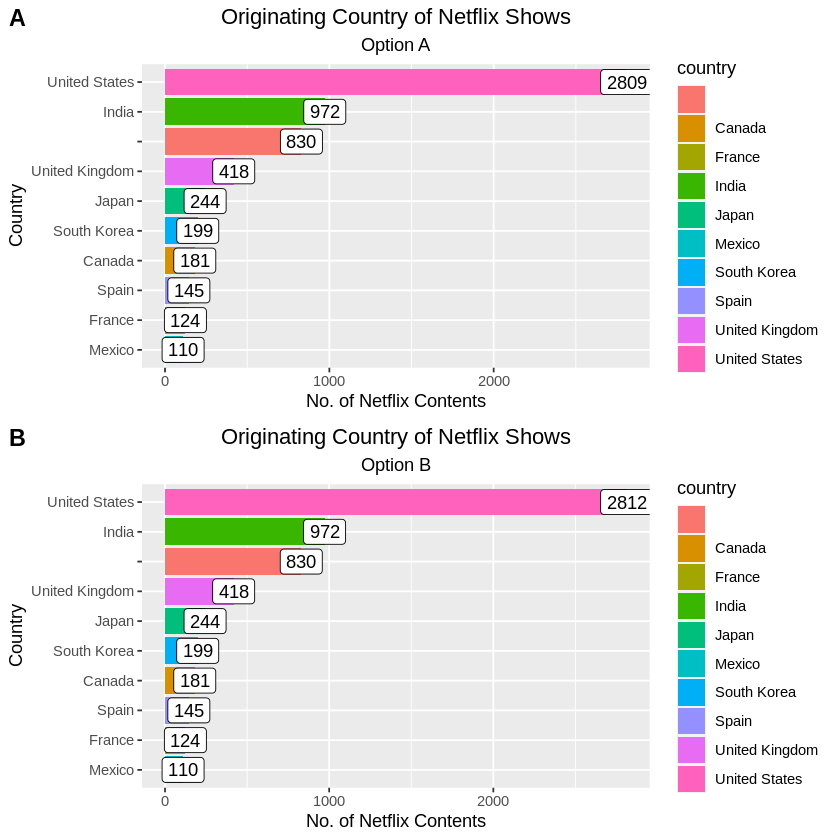

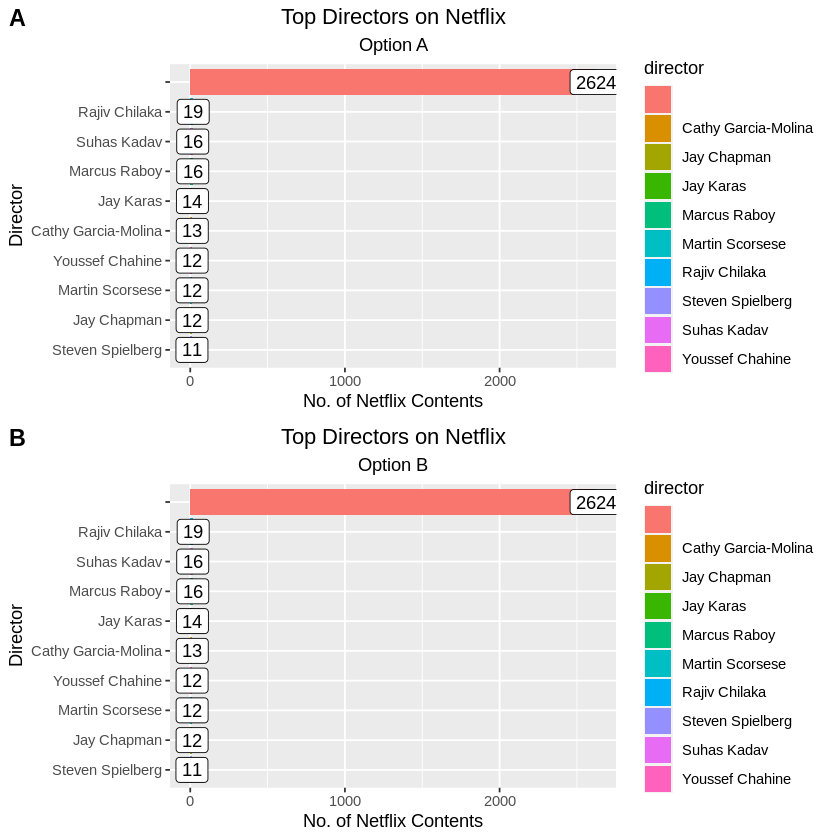

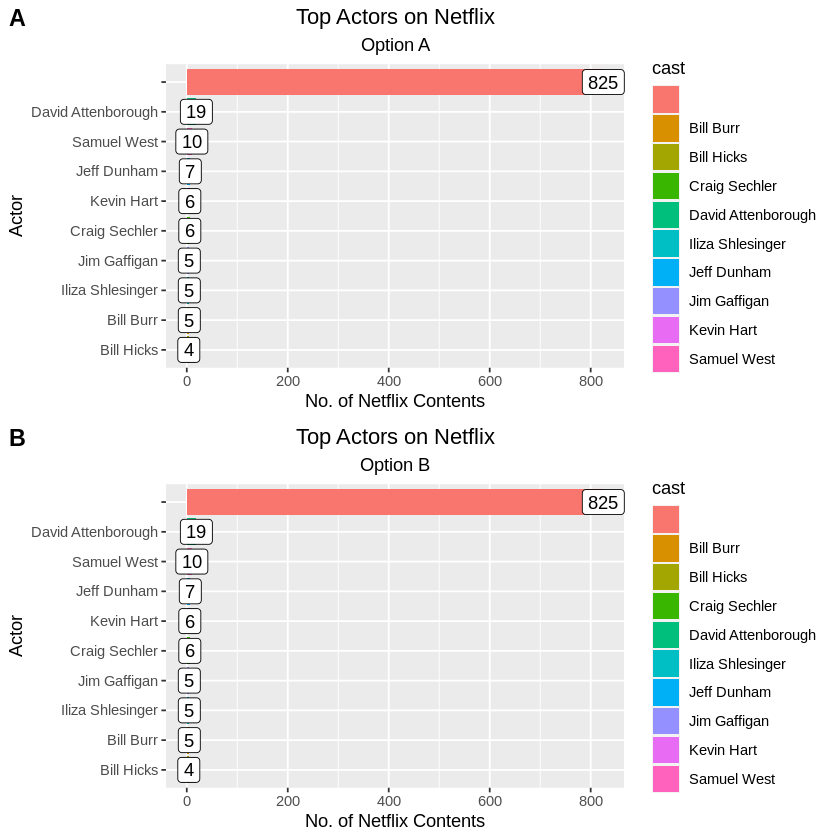

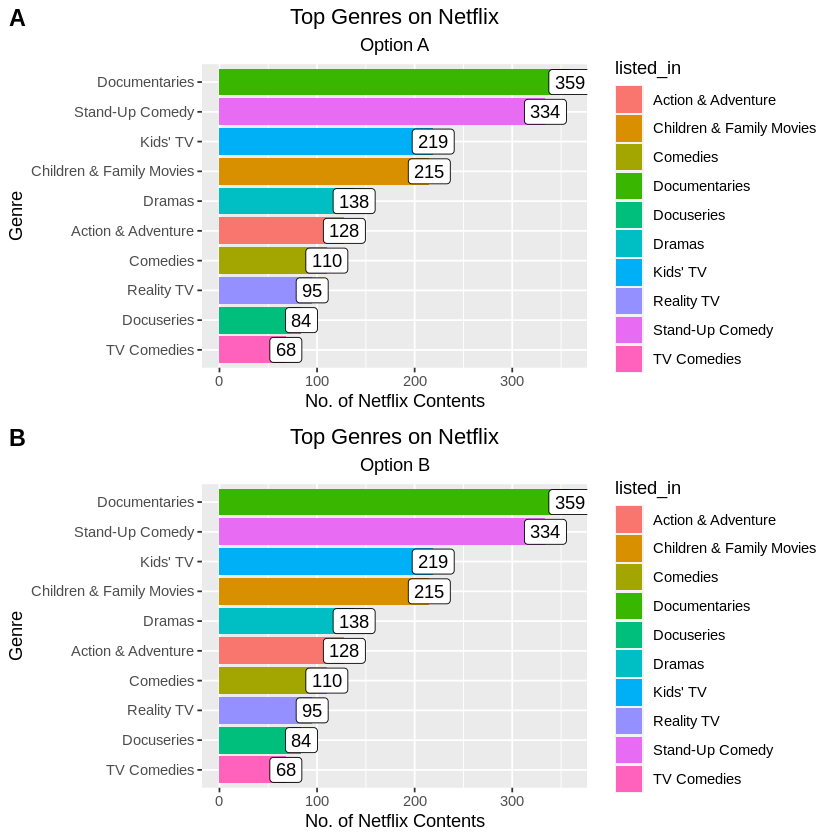

In [71]:
#2x2 visualization
plot_grid(Netflix_5_Country, Netflix_4_Country,
          labels = "AUTO",
          ncol = 1, nrow = 2, align = 'h')


plot_grid(Netflix_5_Director, Netflix_4_Director,
          labels = "AUTO",
          ncol = 1, nrow = 2, align = 'h')

plot_grid(Netflix_5_Actor, Netflix_4_Actor,
          labels = "AUTO",
          ncol = 1, nrow = 2, align = 'h')

plot_grid(Netflix_5_Genres, Netflix_4_Genres,
          labels = "AUTO",
          ncol = 1, nrow = 2, align = 'h')

3.3 Checking Missing Value

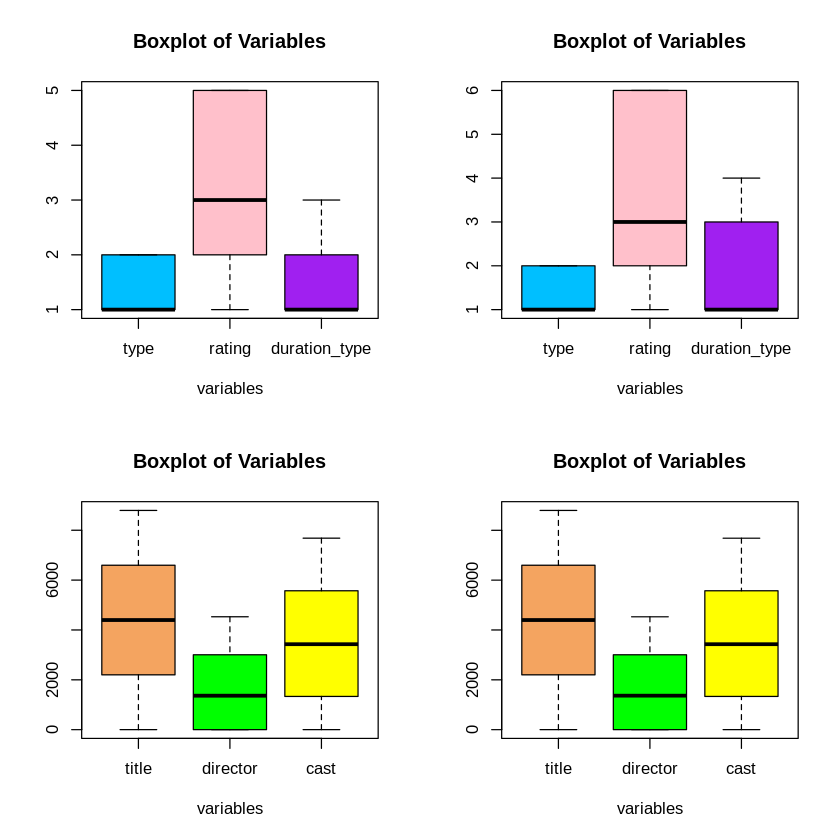

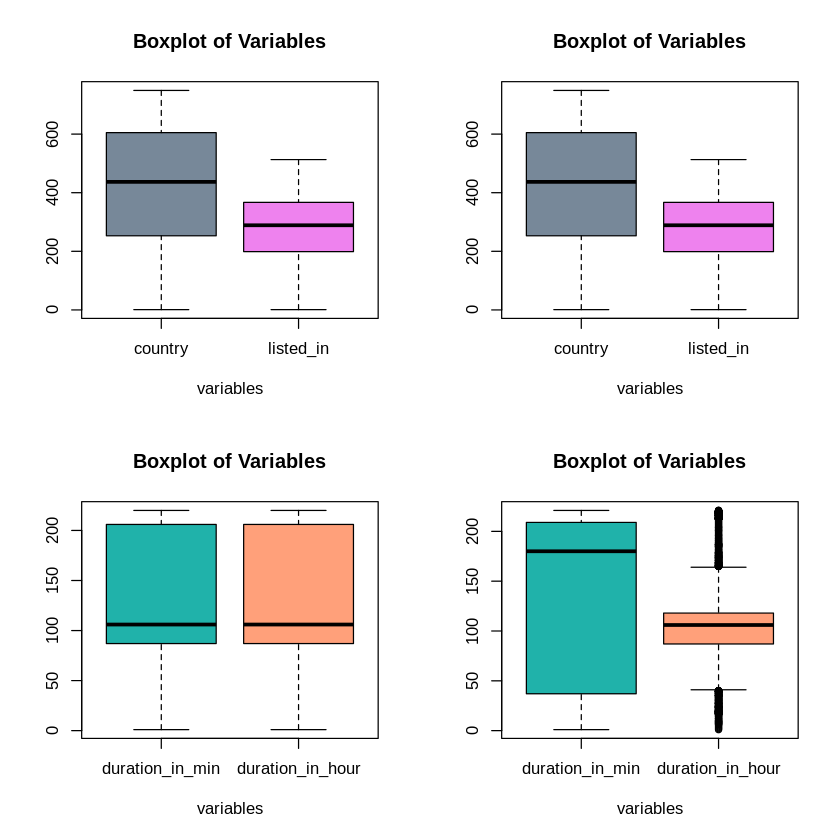

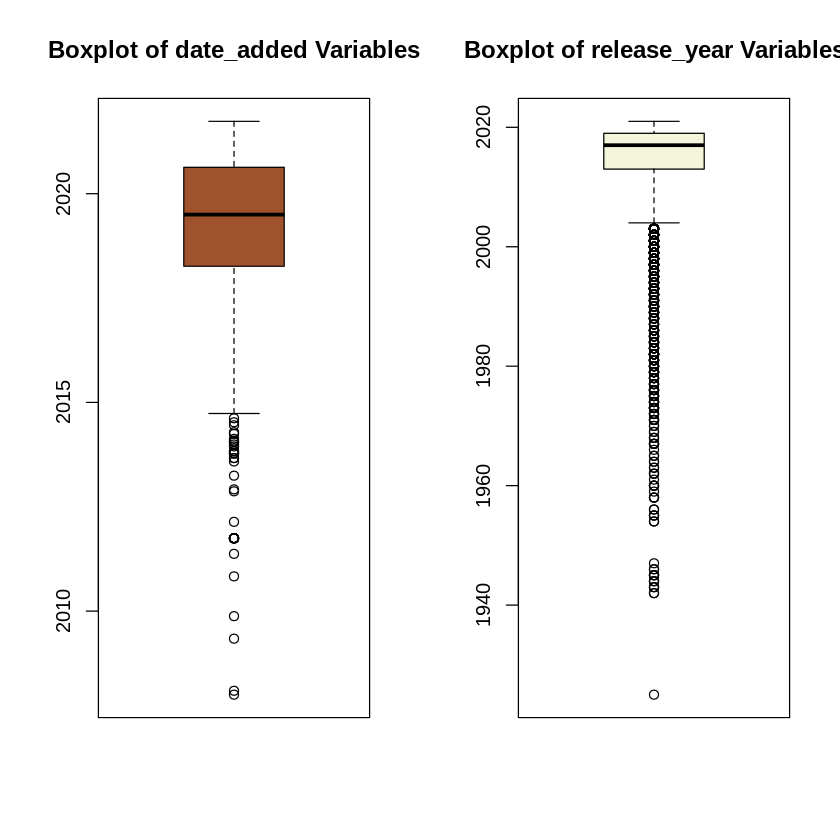

In [72]:
#The following will be the comparison of the outliers for option A and option B. .
#Netflix_5 
par(mfrow=c(2,2))
#outliers for type, rating, duration_type 
boxplot(Netflix_5$type,Netflix_5$rating,Netflix_5$duration_type,
        col=c("deepskyblue","pink","purple"),
        main="Boxplot of Variables",
        names=c("type","rating","duration_type"),
        xlab="variables")

boxplot(Netflix_4$type,Netflix_4$rating,Netflix_4$duration_type,
        col=c("deepskyblue","pink","purple"),
        main="Boxplot of Variables",
        names=c("type","rating","duration_type"),
        xlab="variables")
#outliers for title, director, cast 
boxplot(Netflix_5$title,Netflix_5$director,Netflix_5$cast,
        col=c("sandybrown","green","yellow"),
        main="Boxplot of Variables",
        names=c("title","director","cast"),
        xlab="variables")


boxplot(Netflix_4$title,Netflix_4$director,Netflix_4$cast,
        col=c("sandybrown","green","yellow"),
        main="Boxplot of Variables",
        names=c("title","director","cast"),
        xlab="variables")

#outliers for country, listed_in
boxplot(Netflix_5$country,Netflix_5$listed_in,
        col=c("lightslategray","violet"),
        main="Boxplot of Variables",
        names=c("country","listed_in"),
        xlab="variables")


boxplot(Netflix_4$country,Netflix_4$listed_in,
        col=c("lightslategray","violet"),
        main="Boxplot of Variables",
        names=c("country","listed_in"),
        xlab="variables")
#outliers for duration_in_min, duration_in_hour
boxplot(Netflix_5$duration_in_min,Netflix_5$duration_in_hour,
        col=c("lightseagreen","lightsalmon"),
        main="Boxplot of Variables",
        names=c("duration_in_min","duration_in_hour"),
        xlab="variables")
boxplot(Netflix_4$duration_in_min,Netflix_4$duration_in_hour,
        col=c("lightseagreen","lightsalmon"),
        main="Boxplot of Variables",
        names=c("duration_in_min","duration_in_hour"),
        xlab="variables")
#outliers for date_added and release_year
par(mfrow=c(1,2))
boxplot(Netflix_5$date_added,col=c("sienna"),main="Boxplot of date_added Variables")
boxplot(Netflix_5$release_year,col=c("beige"),main="Boxplot of release_year Variables")
boxplot(Netflix_4$date_added,col=c("sienna"),main="Boxplot of date_added Variables")
boxplot(Netflix_4$release_year,col=c("beige"),main="Boxplot of release_year Variables")


 


4. Exploratory Data Analysis


  Movie TV Show 
   6131    2666 

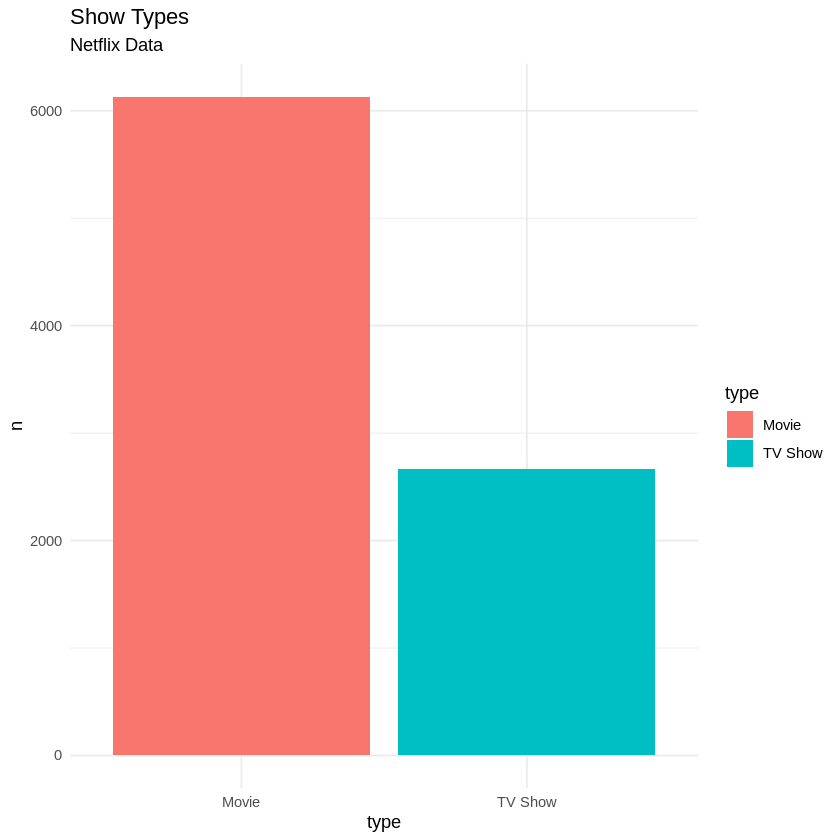

In [73]:
#Netflix Show Type
table(Netflix_4$type)

par(mfrow=c(2,3))
Netflix_4 %>%
  count(type) %>%
  ggplot() + geom_col(aes(x = type, y = n, fill = type)) +
  labs(title = "Show Types",
       subtitle = "Netflix Data") +
  theme_minimal()

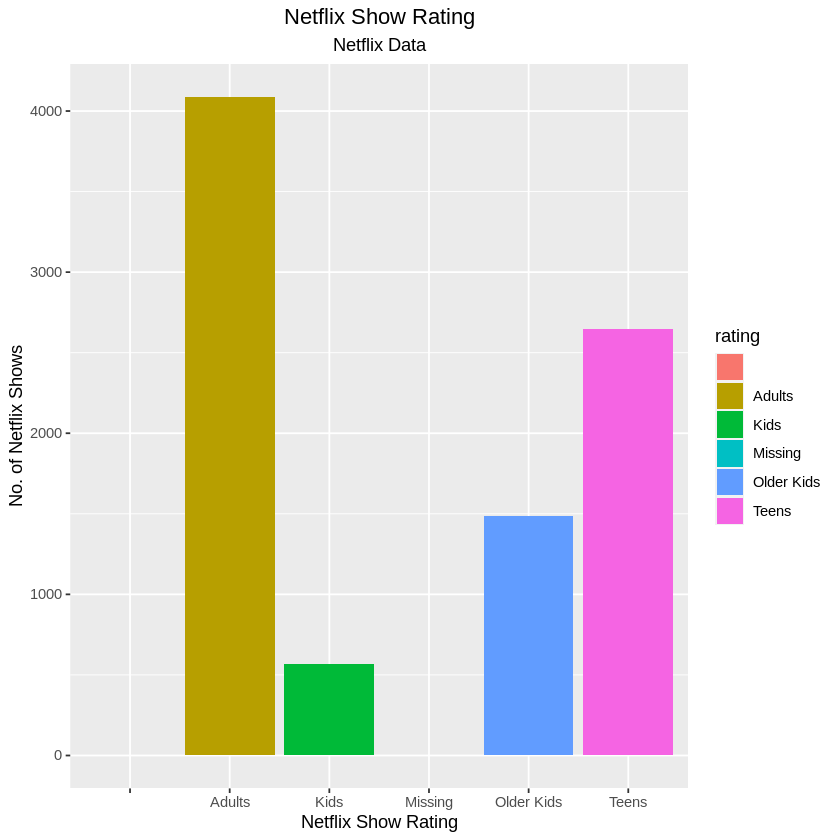

In [74]:
#Netflix Show Rating
Netflix_4 %>%
  count(rating) %>%
  ggplot() + geom_col(aes(x = rating, y = n, fill = rating)) +
  labs(title = "Netflix Show Rating",
       subtitle = "Netflix Data",y="No. of Netflix Shows",x="Netflix Show Rating") +
  theme(plot.title = element_text(hjust=0.5),plot.subtitle = element_text(hjust=0.5))

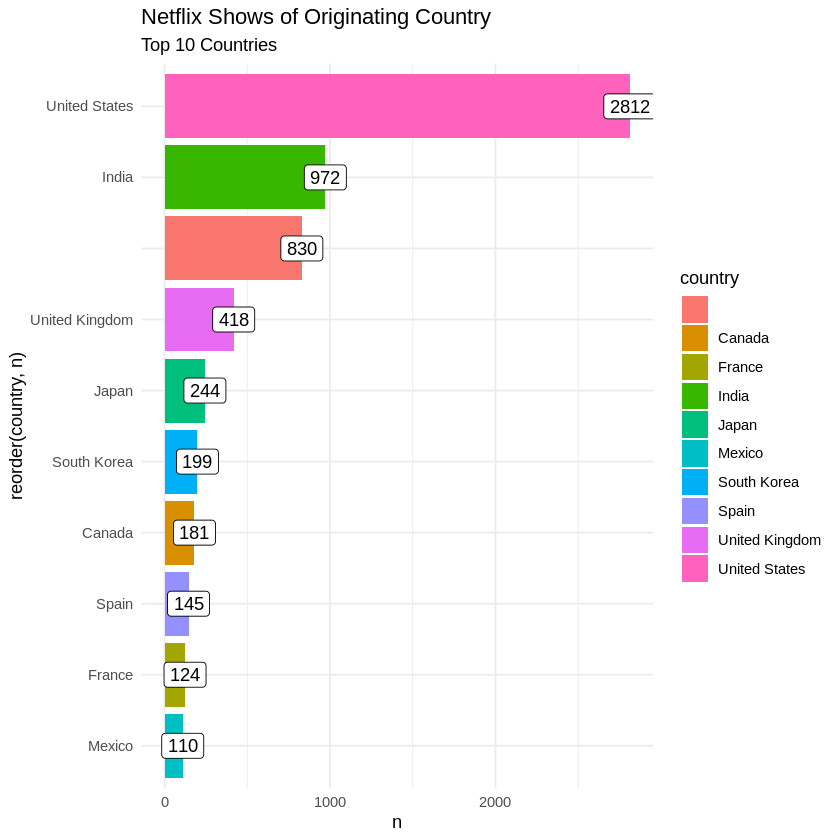

In [75]:
#Distribution of countries
Netflix_4 %>%
  filter(!str_detect(country,',')) %>%
  group_by(country) %>%
  count() %>%
  arrange(desc(n)) %>%
  head(10) %>%
  ggplot() + geom_col(aes(y = reorder(country,n), x = n,fill=country)) +
  geom_label(aes(y = reorder(country,n), x = n, label = n)) +
  labs(title = "Netflix Shows of Originating Country",
       subtitle = "Top 10 Countries") +
  theme_minimal()